In [36]:
import gpxpy
import pandas as pd
from math import sin, cos, sqrt, atan2, radians

# Load gpx.
gpx_path = '/home/plutonium/Downloads/TTT-2021-07-06.gpx'
with open(gpx_path) as f:
    gpx = gpxpy.parse(f)

# Convert to a dataframe one point at a time.
points = []
for segment in gpx.tracks[0].segments:
    for p in segment.points:
        points.append({
            'time': p.time,
            'latitude': p.latitude,
            'longitude': p.longitude,
            'elevation': p.elevation,
        })
df = pd.DataFrame.from_records(points)

In [37]:
print(df)
print(len(df))

                                   time   latitude  longitude   elevation
0      2019-10-16 07:33:57.713000+00:00  26.509767  80.228359   90.438354
1      2019-10-16 07:35:01.699000+00:00  26.509944  80.228292   79.934082
2      2019-10-16 08:12:38.930000+00:00  26.510029  80.228359   71.294617
3      2019-10-16 08:13:40.312000+00:00  26.510034  80.228359   67.496948
4      2019-10-16 08:14:26.353000+00:00  26.509743  80.228763   57.822266
...                                 ...        ...        ...         ...
290077 2021-06-25 13:54:50.942000+00:00  23.154134  79.940585  355.312866
290078 2021-06-25 13:57:21.278000+00:00  23.159229  79.937711  346.602600
290079 2021-06-26 11:18:53.244000+00:00  23.166287  79.938355  359.709106
290080 2021-07-02 12:54:21.230000+00:00  23.163402  79.936641  369.012451
290081 2021-07-02 12:57:37.242000+00:00  23.159404  79.937618  367.442871

[290082 rows x 4 columns]
290082


In [69]:
d = 0
R = 6373.0
distance =0

i = 0 
for i in range(len(df)-1):
    slat = radians(df.latitude[i])
    slon = radians(df.longitude[i])
    elat = radians(df.latitude[i+1])
    elon = radians(df.longitude[i+1])
    dlat = -1*(slat - elat)
    dlon = -1*(slon - elon)
    a = sin(dlat / 2)**2 + cos(slat) * cos(elat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c + distance

In [75]:
print(distance)

8375.914812973508


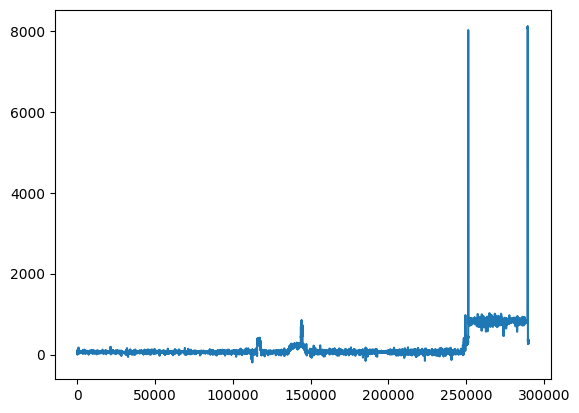

In [76]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(np.arange(0, len(df), 1), df.elevation)